In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)
# # accuracy_threshold = 0.4

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
#WAS ORGINIALLY - if(logs.get('acc')>0.6): - NEEDED AMMENDING 'acc' to 'accuracy'
    if(logs.get('accuracy') < 0.4):
# #     could also be written 
# #     if(logs.get('acc')<0.4):
# #     #OR
# #     if(logs.get('accuracy')> accuracy_threshold):
      print("\n\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

#loading the MNIST data through its API
mnist = tf.keras.datasets.fashion_mnist
# calling the load_data gives two sets of two lists
# (x_train = training_images, y_train = training_labels), (x_test = test_images, y_test = training_labels)
# AKA x_ = images, y_ = labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#normalising the data previously in two seperate commands 
x_train = x_train/255.0
x_test = x_test/255.0
#normalising the data in one line
# x_train, x_test = x_train / 255.0, x_test / 255.0

# 
callbacks = myCallback()

# desging the model - tf.keras.models.Sequential - defines a SEQUENCE of layers of NN
model = tf.keras.models.Sequential([
    # .Flatten just turns the image into a 1 dimensioanl set
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    # .Dense adds a layer of neurons
    # relu means "if X>0 return X, else return 0"
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    # Dense(10, <- 10 is the numbe of classes- must always macth.) softmax takes a set of values and picks the biggest one - saves a lot of coding
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model has previously defined now build it
# this is done by complining it with an optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.fit - asks it to fit your training data to your training labels
# i.e. figure out the relationship between the training data and its actual labels. In future if you have data that looks like the training data, then it can make a prediciton for what that data would look like.
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])


2.1.0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4729 - accuracy: 0.8308
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3594 - accuracy: 0.8675
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3221 - accuracy: 0.8809
Epoch 4/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2992 - accuracy: 0.89 - 8s 131us/sample - loss: 0.2992 - accuracy: 0.8903
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2801 - accuracy: 0.8946
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2666 - accuracy: 0.9003
Epoch 7/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2508 - accuracy: 0.9061
Epoch 8/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2410 - accuracy: 0.9089
Epoch 9/10
60000/60000 [==============================] - 8s 134u

In [3]:
#tests the accuracy of the trained model on the test data
model.evaluate(x_test, y_test )

10000/10000 [==============================] - 1s 138us/sample - loss: 0.3244 - accuracy: 0.8879


[0.3243645142674446, 0.8879]

Returned an accuracy of 0.8452, means approx 84-85%

In [4]:
# creates the set of probabilities of each of the set of classifications for the selected test image
classifications = model.predict(x_test)
print(classifications[1])

[6.4830588e-06 1.0097948e-15 9.9961531e-01 9.0746991e-16 3.4306405e-04
 8.6617191e-15 3.5215173e-05 1.7571673e-21 1.8187439e-13 4.7582625e-17]


2


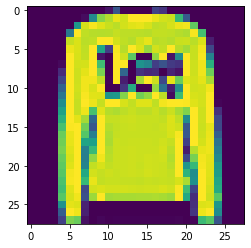

In [5]:
# for the probability was 9.730019 that the image was 2
print(y_test[1])
plt.imshow(x_test[1])


 Classification Number 
 9

 Array of the image 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.  

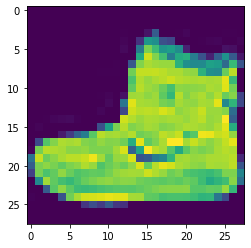

In [6]:
# prints/shows the image
plt.imshow(x_train[0])
# prints the classification number
print('\n Classification Number \n', y_train[0])
# prints an array containing every pixel number of the image - numbers are between 0 & 255 
print('\n Array of the image \n', x_train[0])